In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [4]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [6]:
df.drop('SMK_stat_type_cd',axis=1)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,N


<Axes: xlabel='weight', ylabel='tot_chole'>

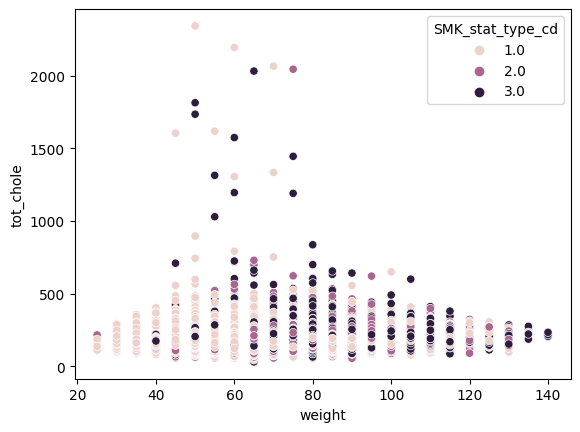

In [7]:
#plt.figure(figsize=(10,10),dpi=200)
sns.scatterplot(data=df,x='weight',y='tot_chole',hue='SMK_stat_type_cd')

In [8]:
df = pd.get_dummies(df,drop_first=True)
df

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_Male,DRK_YN_Y
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,True,True
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,True,False
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,True,False
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,True,False
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,...,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,True,False
991342,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,...,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,True,False
991343,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,...,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,False,True
991344,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,...,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,True,False


<Axes: >

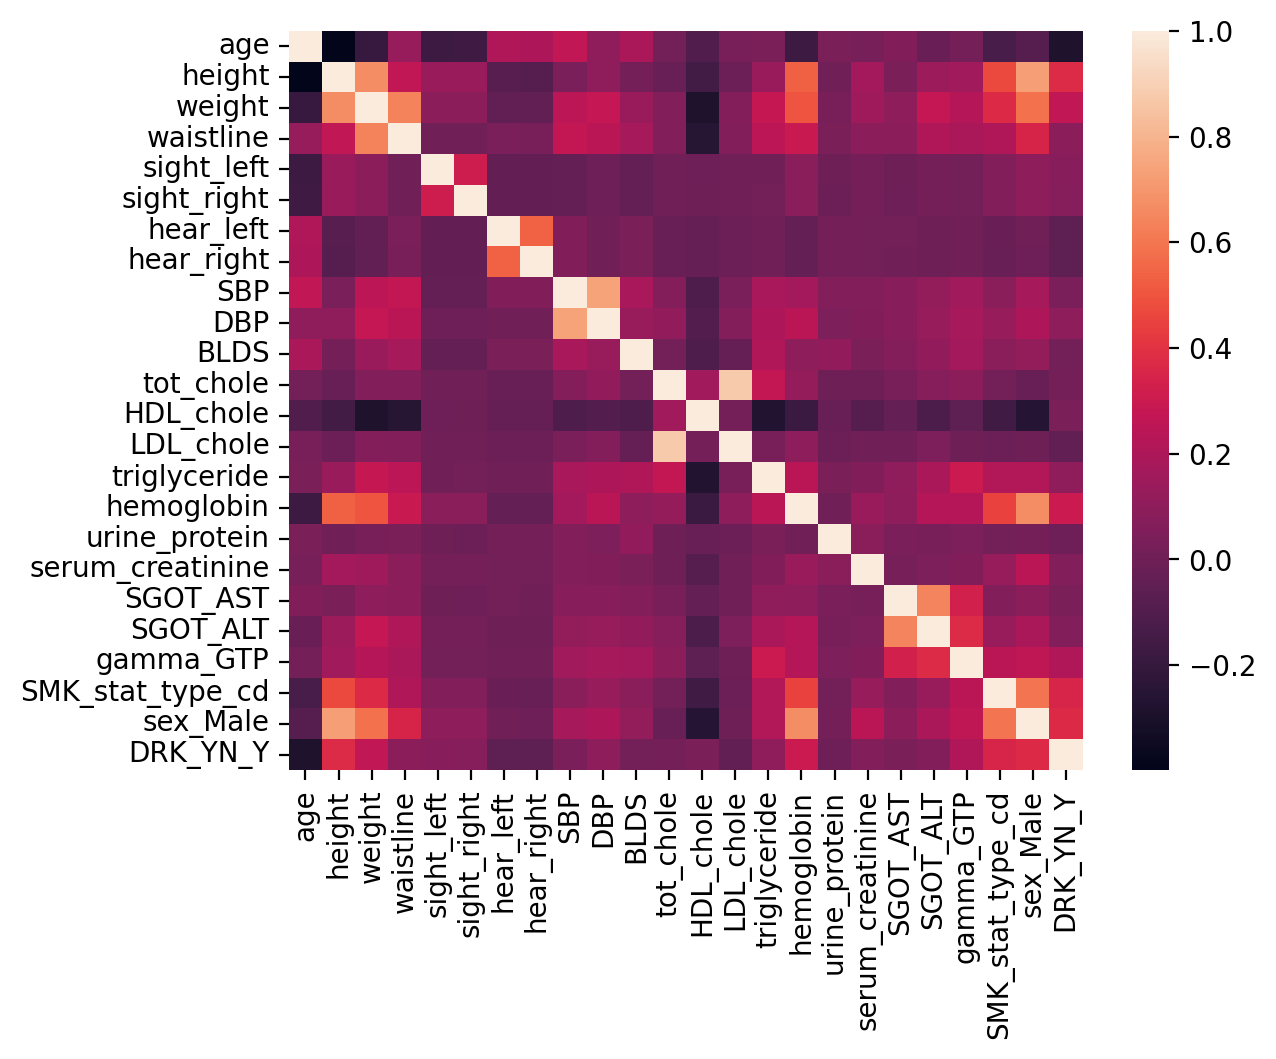

In [9]:
plt.figure(dpi=200)
sns.heatmap(df.corr())

In [10]:
x = df.drop('DRK_YN_Y',axis=1)
y = df['DRK_YN_Y']

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=101)

In [12]:
scaler = StandardScaler()
s_xtrain = scaler.fit_transform(xtrain)
s_xtest = scaler.transform(xtest)

Using SVM with **Radial Basis Function**

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(s_xtrain,ytrain)

In [ ]:
svc_preds = svc.predict(s_xtrain)
accuracy_score(ytest,svc_preds)

Using Random Forests Classifier

In [13]:
rf = RandomForestClassifier()
rf.fit(s_xtrain,ytrain)

RandomForestClassifier()

In [14]:
rf_preds = rf.predict(s_xtest)
accuracy_score(ytest,rf_preds)

0.7325052790144047